In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('/content/customer_booking.csv',encoding='ISO-8859-1')

In [3]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [5]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
def Transformation(data):
  label = LabelEncoder()
  for col in data.columns:
    if isinstance(col,object):
      data[col] = label.fit_transform(data[col])

  return data

In [8]:
data = Transformation(data)

In [9]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,262,9,7,2,0,61,1,0,0,8,0
1,0,0,2,112,10,3,2,0,61,0,0,0,8,0
2,1,0,2,243,12,17,6,0,36,1,1,0,8,0
3,0,0,2,96,21,4,2,0,61,0,0,1,8,0
4,1,0,2,68,12,15,6,0,36,1,0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,2,27,6,9,2,720,4,1,0,1,9,0
49996,0,0,2,111,6,4,3,720,4,0,0,0,9,0
49997,0,0,2,24,6,22,2,720,4,0,0,1,9,0
49998,0,0,2,15,6,11,1,720,4,1,0,1,9,0


In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = [AdaBoostClassifier(),QuadraticDiscriminantAnalysis(),KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),MLPClassifier()]
for i in range(len(models)) :
  pipes = Pipeline([
    ('Scaler',StandardScaler()),
    ('Model',models[i])

  ])

  print(pipes.get_params(),"\n")

{'memory': None, 'steps': [('Scaler', StandardScaler()), ('Model', AdaBoostClassifier())], 'verbose': False, 'Scaler': StandardScaler(), 'Model': AdaBoostClassifier(), 'Scaler__copy': True, 'Scaler__with_mean': True, 'Scaler__with_std': True, 'Model__algorithm': 'SAMME.R', 'Model__base_estimator': 'deprecated', 'Model__estimator': None, 'Model__learning_rate': 1.0, 'Model__n_estimators': 50, 'Model__random_state': None} 

{'memory': None, 'steps': [('Scaler', StandardScaler()), ('Model', QuadraticDiscriminantAnalysis())], 'verbose': False, 'Scaler': StandardScaler(), 'Model': QuadraticDiscriminantAnalysis(), 'Scaler__copy': True, 'Scaler__with_mean': True, 'Scaler__with_std': True, 'Model__priors': None, 'Model__reg_param': 0.0, 'Model__store_covariance': False, 'Model__tol': 0.0001} 

{'memory': None, 'steps': [('Scaler', StandardScaler()), ('Model', KNeighborsClassifier())], 'verbose': False, 'Scaler': StandardScaler(), 'Model': KNeighborsClassifier(), 'Scaler__copy': True, 'Scaler__

In [13]:
models = [AdaBoostClassifier(),QuadraticDiscriminantAnalysis(),KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),MLPClassifier()]
models_Name = ['AdaBoostClassifier','QuadraticDiscriminantAnalysis','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','MLPClassifier']
par_grid = [{'Model__n_estimators':[10,20,25,50,75,100]},
            {'Model__tol':[0.0001,0.001,0.01,0.1]},
            {'Model__n_neighbors':[x for x in range(20)]},
            {'Model__penalty':['l2'],'Model__solver':['lbfgs','newton-cg']},
            {'Model__criterion':['entropy','log_loss','gini'],'Model__max_features':['sqrt', 'log2'],'Model__n_estimators':[50,100,150,200]},
            {'Model__criterion':['friedman_mse', 'squared_error'],'Model__learning_rate':[0.01,0.1,0.15,0.25],'Model__n_estimators':[50,100,200]},
            {'Model__activation':['logistic',],'Model__solver':['sgd', 'adam']}]

In [14]:
grid_1 = []
grid_2 = []
grid_3 = []
grid_4 = []
grid_5 = []
grid_6 = []
grid_7 = []

grids = [grid_1,grid_2,grid_3,grid_4,grid_5,grid_6,grid_7]

for i in range(len(models)) :
  pipes = Pipeline([
    ('Scaler',StandardScaler()),
    ('Model',models[i])

  ])

  grid = GridSearchCV(
      estimator=pipes,
      param_grid=par_grid[i],
      cv=3
  )

  grids[i].append(grid)

  grid.fit(X_train,y_train)

  print(f"{models_Name[i]} has score {grid.best_score_*100} and the his best parameter\n{grid.best_params_}")

AdaBoostClassifier has score 85.01500241870829 and the his best parameter
{'Model__n_estimators': 20}
QuadraticDiscriminantAnalysis has score 81.66001191427715 and the his best parameter
{'Model__tol': 0.0001}
KNeighborsClassifier has score 84.86999991858953 and the his best parameter
{'Model__n_neighbors': 18}
LogisticRegression has score 85.0000003562411 and the his best parameter
{'Model__penalty': 'l2', 'Model__solver': 'lbfgs'}
RandomForestClassifier has score 85.23000029403013 and the his best parameter
{'Model__criterion': 'log_loss', 'Model__max_features': 'log2', 'Model__n_estimators': 150}
GradientBoostingClassifier has score 85.03500216873952 and the his best parameter
{'Model__criterion': 'friedman_mse', 'Model__learning_rate': 0.15, 'Model__n_estimators': 50}
MLPClassifier has score 85.01250029375828 and the his best parameter
{'Model__activation': 'logistic', 'Model__solver': 'adam'}


In [15]:
def evalution_model(model,X_train,y_train,X_test,y_test):
    training_pred = model.predict(X_train)
    testing_pred = model.predict(X_test)
    training_result = accuracy_score(y_train,training_pred)
    testing_result = accuracy_score(y_test,testing_pred)
    return training_result , testing_result

In [24]:
training_res = []
testing_res = []
for model in grids :
    x = 0
    training_acc,testing_acc = evalution_model(model[x],X_train,y_train,X_test,y_test)
    x = x +1
    training_res.append(training_acc)
    testing_res.append(testing_acc)
    print(f"{models_Name[x]} has training accuract {training_acc*100} and test accuracy {testing_acc*100}")

QuadraticDiscriminantAnalysis has training accuract 85.0175 and test accuracy 85.24000000000001
QuadraticDiscriminantAnalysis has training accuract 81.8925 and test accuracy 81.95
QuadraticDiscriminantAnalysis has training accuract 85.155 and test accuracy 85.04
QuadraticDiscriminantAnalysis has training accuract 85.005 and test accuracy 85.2
QuadraticDiscriminantAnalysis has training accuract 99.9875 and test accuracy 85.67
QuadraticDiscriminantAnalysis has training accuract 85.075 and test accuracy 85.33
QuadraticDiscriminantAnalysis has training accuract 85.075 and test accuracy 85.27


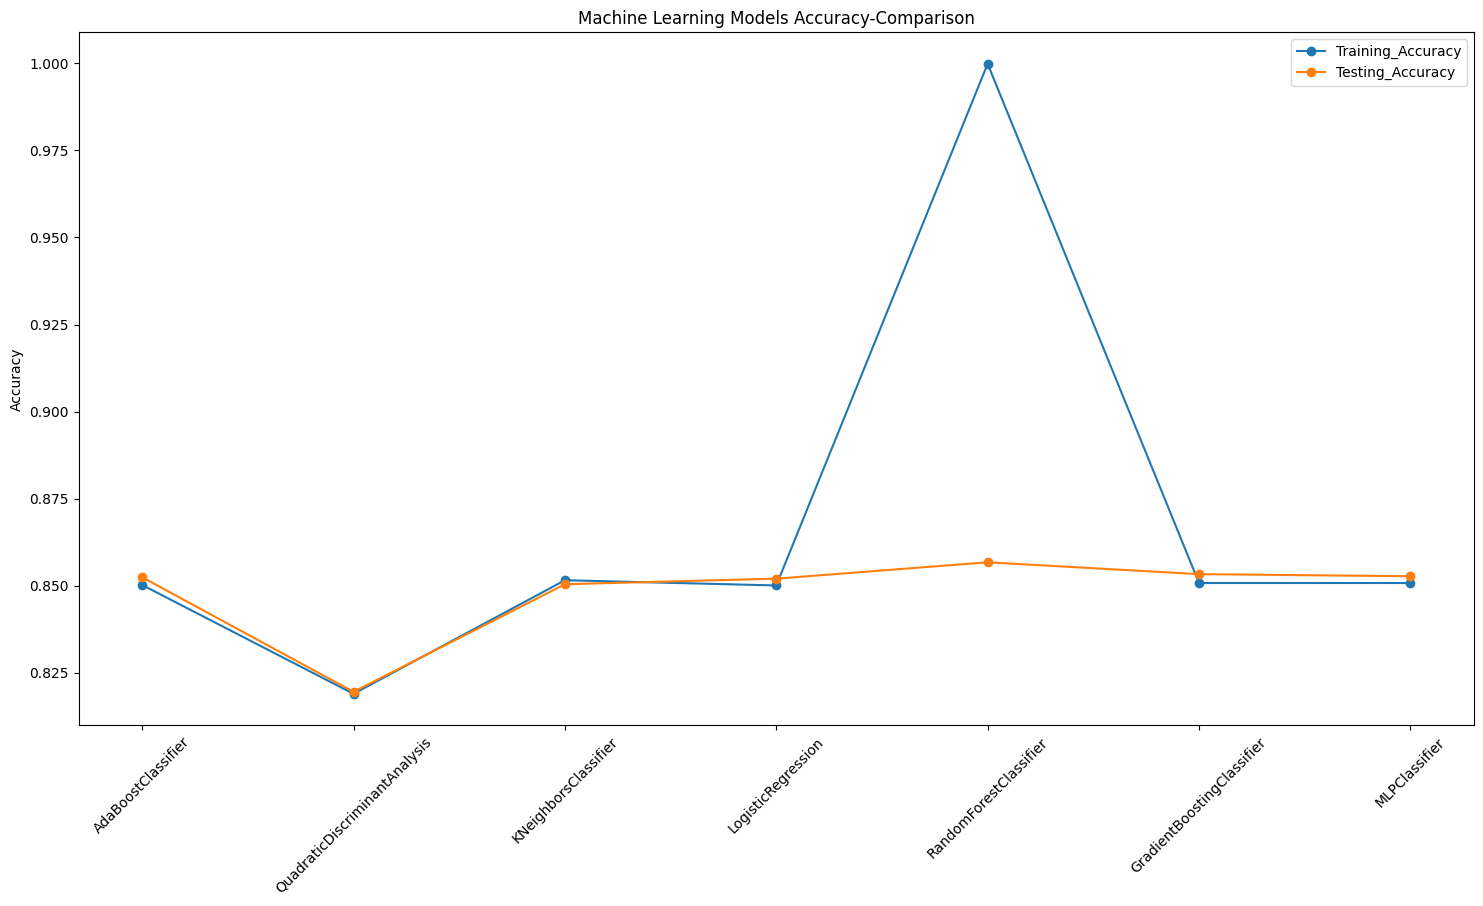

In [23]:
plt.figure(figsize=(18,9))
plt.plot(models_Name,training_res,'o-',label='Training_Accuracy')
plt.plot(models_Name,testing_res,'o-',label='Testing_Accuracy')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.legend()
plt.title("Machine Learning Models Accuracy-Comparison")
plt.show()